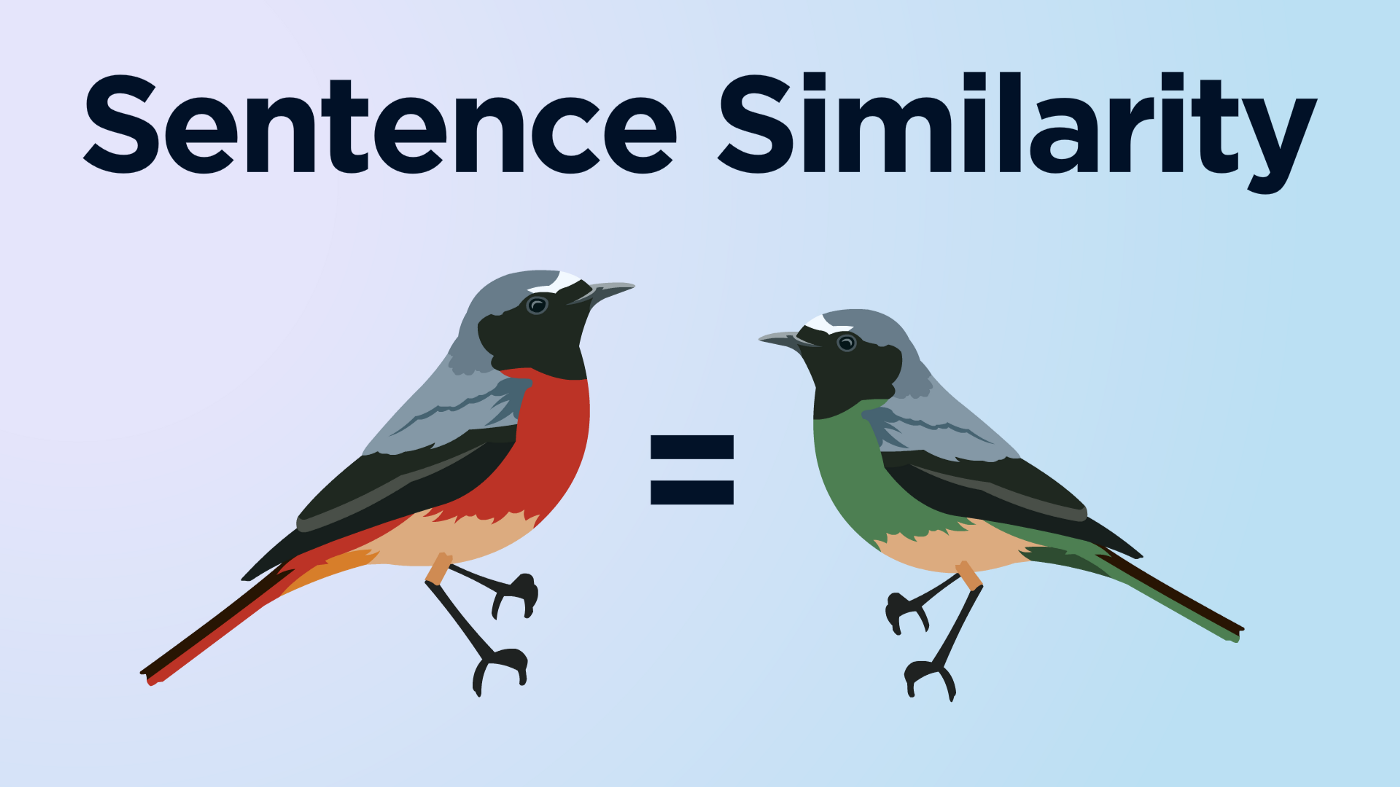

# Importing neccesary Libraries

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
import pandas as pd
import numpy as np

# Importing Dataset

In [3]:
df = pd.read_csv('Text_Similarity.csv')

In [4]:
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


# Similarity of first 20 records 

In [5]:
text1 = df['text1']
text2 = df['text2']

In [6]:
model_name = "bert-base-nli-mean-tokens"

In [7]:
model = SentenceTransformer(model_name)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
sample1 = text1[:20].values
sample2 = text2[:20].values

In [10]:
sentence_vecs1 = model.encode(sample1)
sentence_vecs2 = model.encode(sample2)

In [11]:
sentence_vecs1.shape

(20, 768)

In [12]:
list1 = []
for i in range(len(sample1)):
    list1.append(cosine_similarity([sentence_vecs1[i]],[sentence_vecs2[i]])[0][0])

In [13]:
df_new = df.iloc[0:20]

In [14]:
df_new['Similarity'] = list1 

C:\Users\acer\AppData\Local\Temp\ipykernel_13060\4037900388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Similarity'] = list1


In [15]:
df_new.head()

,text1,text2,Similarity
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.623987
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.647651
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,0.574893
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,0.550737
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.645250


# Similarity of Input define Strings

In [16]:
sentence_vecs3 = model.encode(input("Enter the first text1 : "))
sentence_vecs4 = model.encode(input("Enter the first text2 : "))
cosine_similarity([sentence_vecs3],[sentence_vecs4])[0][0]

Enter the first text1 : My name is Rashid ALi !
Enter the first text2 : my name is ali rashid


0.9240347

# Similarity After preprocessing the Text data

In [17]:
from nltk.corpus import stopwords

In [18]:
stp = stopwords.words('english')

In [19]:
df['text1'] = df['text1'].str.lower()
df['text2'] = df['text2'].str.lower()

In [20]:
df

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [21]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word.lower() in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [22]:
text5 = df.iloc[0:20,0].apply(remove_stopwords)
text6 = df.iloc[0:20,-1].apply(remove_stopwords)

In [23]:
import string
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [24]:
text5 = text5.apply(remove_punc)
text6 = text6.apply(remove_punc)

In [25]:
sentence_vecs5 = model.encode(text5)
sentence_vecs6 = model.encode(text6)

In [26]:
list2 = []
for i in range(len(text5)):
    list2.append(cosine_similarity([sentence_vecs5[i]],[sentence_vecs6[i]])[0][0])

In [27]:
df_new['Similarity After Processing'] = list2 

C:\Users\acer\AppData\Local\Temp\ipykernel_13060\1013453438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Similarity After Processing'] = list2


In [28]:
df_new.head()

,text1,text2,Similarity,Similarity After Processing
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.623987,0.755719
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.647651,0.728845
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,0.574893,0.654460
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,0.550737,0.687529
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.645250,0.746392


# Similarity BY Functions

In [29]:
def CalScore(text1,text2):
    a = remove_stopwords(text1)
    b = remove_stopwords(text2)
    c = remove_punc(a)
    d = remove_punc(b)
    sentence_vecs1 = model.encode(c)
    sentence_vecs2 = model.encode(d)
    return cosine_similarity([sentence_vecs1],[sentence_vecs2])[0][0]

In [30]:
txt1 = input("Enter the text1: ")
txt2 = input("Enter the text2: ")
print(CalScore(txt1,txt2))

Enter the text1: player burn-out worries robinson england coach...
Enter the text2: hanks greeted at wintry premiere hollywood sta...
0.21664658


In [31]:
import pickle
f =open('model','wb')
pickle.dump(CalScore,f)

In [32]:
loaded=pickle.load(open('model.pkl',"rb"))
loaded(txt1,txt2)

0.21664658